In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']

In [4]:
X_validation, y_validation = valid['features'], valid['labels']

In [5]:
X_test, y_test = test['features'], test['labels']

10

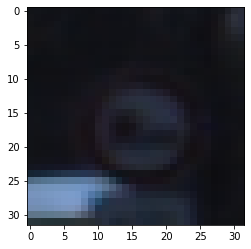

In [6]:
i = np.random.randint(0, len(X_train))
plt.imshow(X_train[i])
y_train[i]

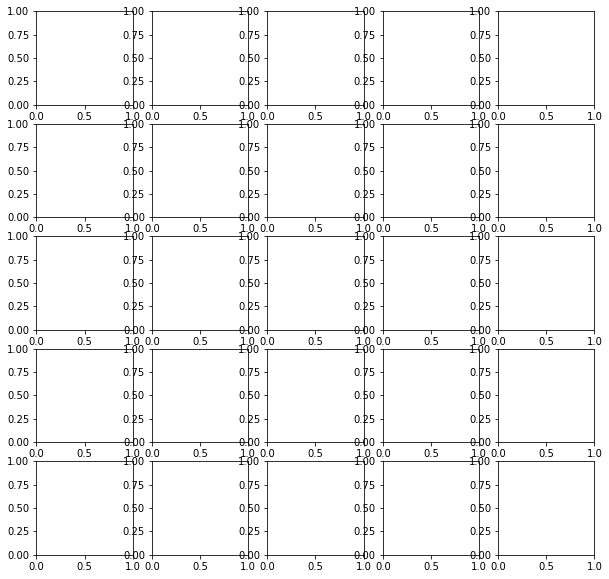

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train)

In [8]:
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, len(X_train))
    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

<Figure size 432x288 with 0 Axes>

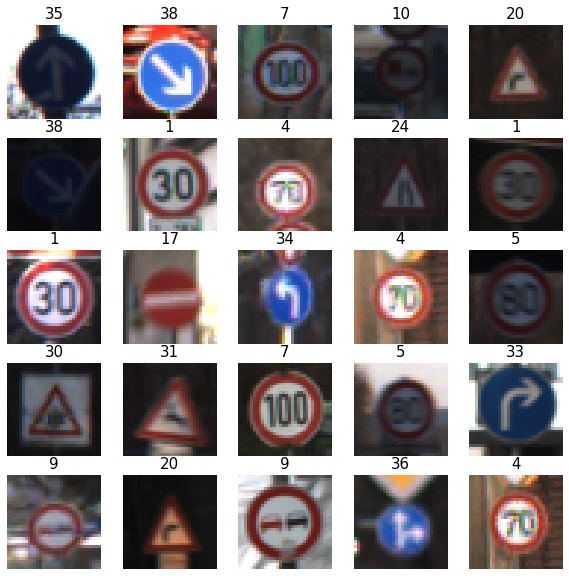

In [9]:
fig

In [10]:
from sklearn.utils import shuffle

In [11]:
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [13]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

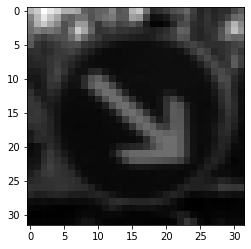

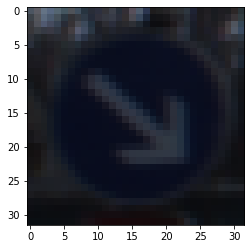

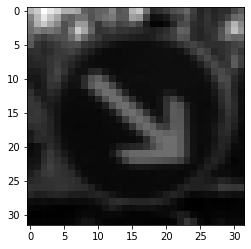

In [14]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [18]:
from tensorflow.keras import datasets, layers, models

In [16]:
CNN = models.Sequential()

In [17]:
CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))

CNN.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
____

In [19]:
CNN.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [20]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 15s 434us/sample - loss: 3.2077 - acc: 0.1671 - val_loss: 2.8657 - val_acc: 0.3034
Epoch 2/5
34799/34799 [==============================] - 12s 331us/sample - loss: 2.1113 - acc: 0.4148 - val_loss: 1.8214 - val_acc: 0.4773
Epoch 3/5
34799/34799 [==============================] - 12s 331us/sample - loss: 1.3613 - acc: 0.6036 - val_loss: 1.2483 - val_acc: 0.6392
Epoch 4/5
34799/34799 [==============================] - 11s 328us/sample - loss: 0.9538 - acc: 0.7221 - val_loss: 0.9345 - val_acc: 0.7349
Epoch 5/5
34799/34799 [==============================] - 11s 325us/sample - loss: 0.7248 - acc: 0.7857 - val_loss: 0.7313 - val_acc: 0.7794


In [23]:
score = CNN.evaluate(X_test_gray_norm, y_test)

12630/12630 [==============================] - 2s 134us/sample - loss: 0.9672 - acc: 0.7673


In [27]:
print(f'Test Accuracy: {score[1]}')

Test Accuracy: 0.7673000693321228


In [39]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [42]:
epochs = range(len(accuracy))

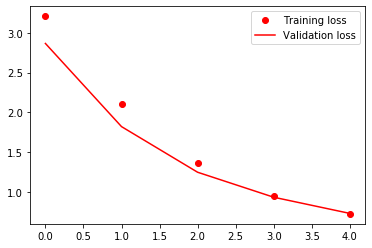

In [51]:
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend()

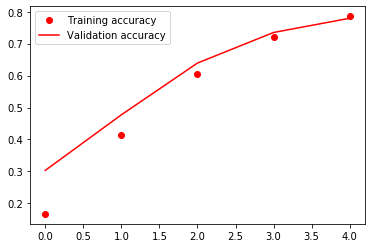

In [52]:
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.legend()

In [70]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)

In [78]:
y_true = y_test

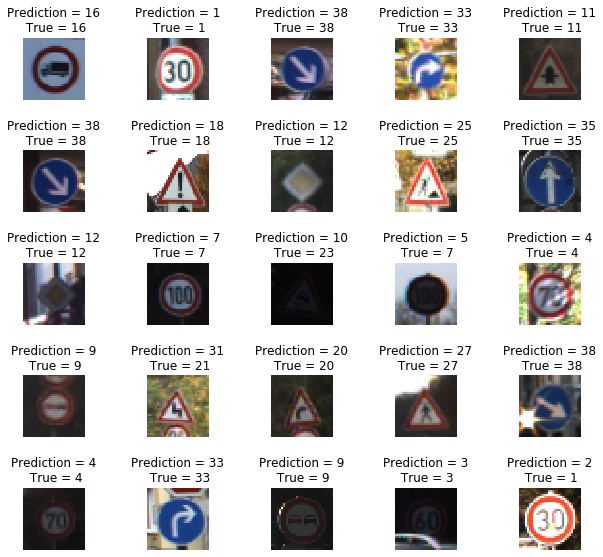

In [80]:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):    
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)